In [1]:
import os
os.chdir(os.path.pardir)
print(os.getcwd())
from utilities import plot_fd_and_original, plot_fd_and_speeds
import matplotlib.pyplot as plt

D:\UniPi\erasmus\courses\MLCS\MLCMS-project\src


In [2]:
def get_all_result_data(results):
    tr_mean = []
    tr_std = []
    val_mean = []
    val_std = []
    test_mean = []
    test_std = []
    for key in results.keys():
        tr_mean.append(results[key]['tr'][0])
        tr_std.append(results[key]['tr'][1])
        val_mean.append(results[key]['val'][0])
        val_std.append(results[key]['val'][1])
        test_mean.append(results[key]['test'][0])
        test_std.append(results[key]['test'][1])
    return tr_mean, tr_std, val_mean, val_std, test_mean, test_std
def plot_results(results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, plot_val=False, title=""):
    fig, ax = plt.subplots()
    ax.fill_between(range(len(tr_std)), [tr_mean[i]+tr_std[i] for i in range(len(tr_std))], [tr_mean[i]-tr_std[i] for i in range(len(tr_std))], alpha=0.2, color='orange')
    ax.plot(tr_mean, label='training_loss', c='orange')
    ax.scatter(range(len(tr_mean)), tr_mean, c='orange')
    
    if plot_val:
        ax.fill_between(range(len(val_std)), [val_mean[i]+val_std[i] for i in range(len(val_std))], [val_mean[i]-val_std[i] for i in range(len(val_std))], alpha=0.2)
        ax.plot(val_mean, label='validation_loss')
        ax.scatter(range(len(val_mean)), val_mean, c='blue')

    ax.fill_between(range(len(test_std)), [test_mean[i]+test_std[i] for i in range(len(test_std))], [test_mean[i]-test_std[i] for i in range(len(test_std))], alpha=0.2, color='red')
    ax.plot(test_mean, label='testing_loss', c='red')
    ax.scatter(range(len(test_mean)), test_mean, c='red')
    plt.legend()
    ax.set_ylabel('MSE')
    ax.set_xlabel('model conf')
    ax.set_xticks(range(len(results.keys())), labels=results.keys())
    plt.title(title)
    plt.show()

In [3]:
corridor_85_results = {'(1,)--1': {'tr': (0.045912862271070484, 0.0031267345031365146), 'val': (0.04742169372737408, 0.0031119121269140935), 'test': (0.0476672403847664, 0.0039469590234120335)}, 
'(2,)--1': {'tr': (0.03664128817617894, 0.003182476102173639), 'val': (0.03853945817798376, 0.0033564231210634296), 'test': (0.04050630591336996, 0.002731126083062373)}, 
'(3,)--1': {'tr': (0.033373928852379324, 0.0018829191626169833), 'val': (0.035154239647090434, 0.0018664107327763268), 'test': (0.03871563824589665, 0.0016801948788747623)}, 
'(4, 2)-0.4': {'tr': (0.030664595104753972, 0.001851953384442897), 'val': (0.03249462600797414, 0.0019940795626529786), 'test': (0.03825132212658357, 0.0019405094251864585)}, 
'(5, 2)-0.4': {'tr': (0.029973307326436043, 0.0019320427350314425), 'val': (0.03196305438876153, 0.002029259209802658), 'test': (0.03746844874792181, 0.0010017009011062954)}, 
'(5, 3)-0.4': {'tr': (0.03051294256001711, 0.002172826645295372), 'val': (0.03253234028816223, 0.0023648521244316076), 'test': (0.03710711689572175, 0.0018621574798779472)}, 
'(6, 3)-0.4': {'tr': (0.03004354938864708, 0.0021208966134423995), 'val': (0.03249930314719677, 0.0027163875850789647), 'test': (0.03759107491804222, 0.0019266819358078092)}, 
'(10, 4)-0.4': {'tr': (0.02741089586168528, 0.001986981721097928), 'val': (0.02964006066322326, 0.0021461797559127775), 'test': (0.03635013228379024, 0.0010135238565525883)}}

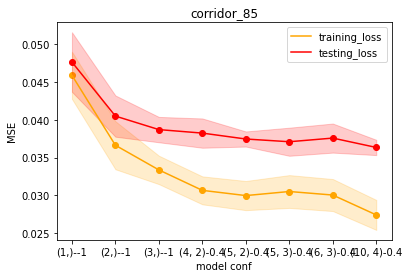

In [4]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85")